In [1]:
%tensorflow_version 2.x
import tensorflow as tf
device_name = tf.test.gpu_device_name()

print('Found GPU at: {}'.format(device_name))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
Found GPU at: 


In [2]:
import numpy as np
import pandas as pd
import math
import sklearn
import seaborn as sns
import sklearn.preprocessing
import datetime
import os
import matplotlib.pyplot as plt
import tensorflow as tf

# split data in 80%/10%/10% train/validation/test sets
valid_set_size_percentage = 10 
test_set_size_percentage = 10 

#display parent directory and working directory
print(os.path.dirname(os.getcwd())+':', os.listdir(os.path.dirname(os.getcwd())));
print(os.getcwd()+':', os.listdir(os.getcwd()));

/: ['sbin', 'srv', 'home', 'dev', 'lib64', 'tmp', 'media', 'usr', 'opt', 'etc', 'libx32', 'lib', 'run', 'bin', 'proc', 'mnt', 'root', 'boot', 'lib32', 'var', 'sys', 'content', '.dockerenv', 'tools', 'datalab', 'NGC-DL-CONTAINER-LICENSE']
/content: ['.config', 's4.csv', 's1.csv', 's2.csv', 's3.csv', 'sample_data']


In [3]:
df1=pd.read_csv('s1.csv')

In [4]:
df2=pd.read_csv('s2.csv')

In [5]:
df3=pd.read_csv('s3.csv')

In [6]:
df4=pd.read_csv('s4.csv')

In [7]:
df1.tail()

,Nama Barang,Kode Barang,Waktu Discover,RSSI
65,hoodie,EPC:E200 3411 B802 0110 3300 7327,Disc:2022/12/22 11:40:10,RSSI:10367.6
66,blouse,EPC:E200 3411 B802 0110 3300 7329,Disc:2022/12/22 11:40:10,RSSI:13418.9
67,jumpsuit,EPC:E200 3411 B802 0110 3300 7382,Disc:2022/12/22 11:40:10,RSSI:11612.5
68,frontier pants,EPC:E200 3411 B802 0110 3300 7320,Disc:2022/12/22 11:40:10,RSSI:6024.6
69,mini dress,EPC:E200 3411 B802 0110 3300 7377,Disc:2022/12/22 11:40:10,RSSI:9247.9


In [8]:
df1.rename(columns = {"Nama Barang": "Barang"}, inplace = True)

In [9]:
df1.RSSI.unique()

array([' RSSI:4656.0', ' RSSI:13190.5', ' RSSI:16854.9', ' RSSI:11626.5',
       ' RSSI:31474.3', ' RSSI:5076.6', ' RSSI:9068.4', ' RSSI:8648.7',
       ' RSSI:10367.6', ' RSSI:13418.9', ' RSSI:11612.5', ' RSSI:6024.6',
       ' RSSI:9247.9', ' RSSI:11032.4', ' RSSI:7888.6', ' RSSI:7295.5',
       ' RSSI:4276.2', ' RSSI:6679.2', nan, ' RSSI:6885.9',
       ' RSSI:2049.2', ' RSSI:5748.4', ' RSSI:3419.7', ' RSSI:3535.9',
       ' RSSI:2900.7', ' RSSI:5595.9', ' RSSI:3916.9', ' RSSI:3105.3',
       ' RSSI:2435.8', ' RSSI:2217.9', ' RSSI:3422.5', ' RSSI:9100.6',
       ' RSSI:10294.8', ' RSSI:10224.8', ' RSSI:9295.2', ' RSSI:10600.1',
       ' RSSI:6299.7', ' RSSI:7300.6', ' RSSI:9520.6', ' RSSI:2823.8',
       ' RSSI:7766.3', ' RSSI:4994.8', ' RSSI:8142.4', ' RSSI:2413.2',
       ' RSSI:1249.6', ' RSSI:1523.9', ' RSSI:10494.7', ' RSSI:6010.0',
       ' RSSI:9154.8', ' RSSI:9299.7', ' RSSI:8750.7', ' RSSI:8840.4',
       ' RSSI:13158.2'], dtype=object)

In [10]:
df1.RSSI.nunique()

52

In [11]:
df1

,Barang,Kode Barang,Waktu Discover,RSSI
0,palazzo,EPC:E200 3411 B802 0110 3300 7337,Disc:2022/12/22 11:40:10,RSSI:4656.0
1,hot pants,EPC:E200 3411 B802 0110 3300 7322,Disc:2022/12/22 11:40:10,RSSI:13190.5
2,overalls,EPC:E200 3411 B802 0110 3300 7318,Disc:2022/12/22 11:40:10,RSSI:16854.9
3,boot cut,EPC:E200 3411 B802 0110 3300 7325,Disc:2022/12/22 11:40:10,RSSI:11626.5
4,kemeja,EPC:E200 3411 B802 0110 3300 7344,Disc:2022/12/22 11:40:10,RSSI:31474.3
...,...,...,...,...
65,hoodie,EPC:E200 3411 B802 0110 3300 7327,Disc:2022/12/22 11:40:10,RSSI:10367.6
66,blouse,EPC:E200 3411 B802 0110 3300 7329,Disc:2022/12/22 11:40:10,RSSI:13418.9
67,jumpsuit,EPC:E200 3411 B802 0110 3300 7382,Disc:2022/12/22 11:40:10,RSSI:11612.5
68,frontier pants,EPC:E200 3411 B802 0110 3300 7320,Disc:2022/12/22 11:40:10,RSSI:6024.6


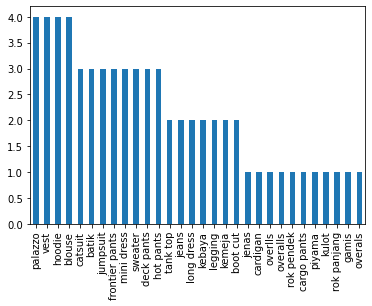

In [12]:
df1['Barang'].value_counts().plot.bar()

In [13]:
df2.head()

,Nama Barang,Kode Barang,Waktu Discover,RSSI
0,kulot,EPC:E200 3411 B802 0110 3300 7387,Disc:2022/12/22 14:40:24,RSSI:3437.8
1,boot cut,EPC:E200 3411 B802 0110 3300 7325,Disc:2022/12/22 14:40:24,RSSI:4092.6
2,tank top,EPC:E200 3411 B802 0110 3300 7374,Disc:2022/12/22 14:40:24,RSSI:2941.1
3,jumpsuit,EPC:E200 3411 B802 0110 3300 7382,Disc:2022/12/22 14:40:24,RSSI:9309.8
4,cardigan,EPC:E200 3411 B802 0110 3300 7375,Disc:2022/12/22 14:40:24,RSSI:13207.5


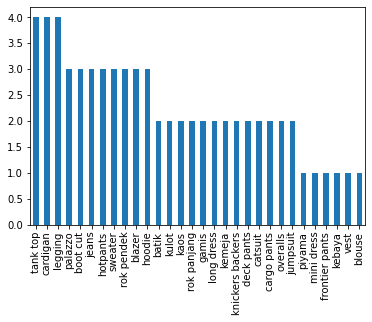

In [14]:
df2['Nama Barang'].value_counts().plot.bar()

In [15]:
df3.head()

,Nama barang,Kode barang,Waktu discover,RSSI
0,long dress,EPC:E200 3411 B802 0110 3300 7332,Disc:2022/01/08 11:09:40,RSSI:11427.4
1,blazer,EPC:E200 3411 B802 0110 3300 7338,Disc:2022/01/08 11:09:40,RSSI:23309.1
2,kemeja,EPC:E200 3411 B802 0110 3300 7344,Disc:2022/01/08 11:09:40,RSSI:11950.2
3,blouse,EPC:E200 3411 B802 0110 3300 7329,Disc:2022/01/08 11:09:40,RSSI:4029.8
4,kebaya,EPC:E200 3411 B802 0110 3300 7317,Disc:2022/01/08 11:09:40,RSSI:5572.7


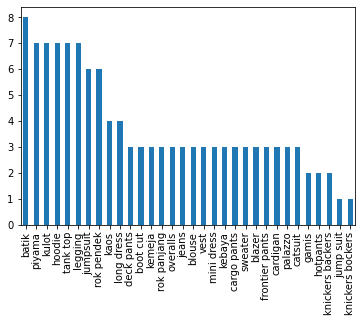

In [16]:
df3['Nama barang'].value_counts().plot.bar()

In [17]:
df4.head()

,Nama Barang,Kode Barang,Waktu Discover,RSSI
0,frontier pants,EPC:E200 3411 B802 0110 3300 7320,Disc:2022/01/09 10:34:58,RSSI:21776.5
1,kulot,EPC:E200 3411 B802 0110 3300 7387,Disc:2022/01/09 10:34:58,RSSI:27190.6
2,deck pants,EPC:E200 3411 B802 0110 3300 7385,Disc:2022/01/09 10:34:58,RSSI:37614.7
3,cargo pants,EPC:E200 3411 B802 0110 3300 7330,Disc:2022/01/09 10:34:58,RSSI:17144.5
4,jumpsuit,EPC:E200 3411 B802 0110 3300 7382,Disc:2022/01/09 10:34:58,RSSI:17912.7


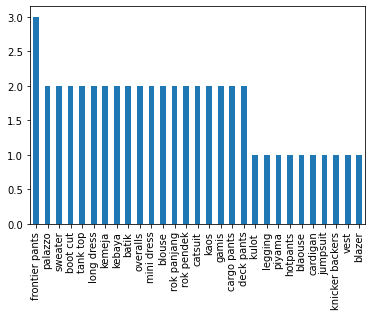

In [18]:
df4['Nama Barang'].value_counts().plot.bar()

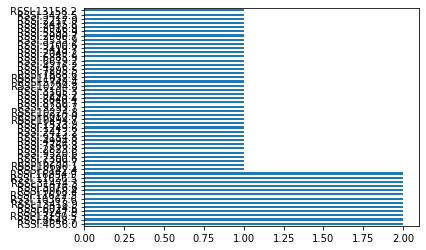

In [19]:
df1['RSSI'].value_counts().plot.barh()

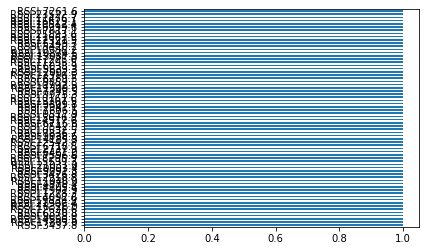

In [20]:
df2['RSSI'].value_counts().plot.barh()

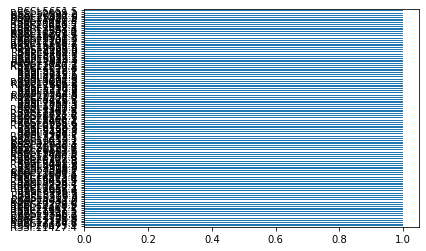

In [21]:
df3['RSSI'].value_counts().plot.barh()

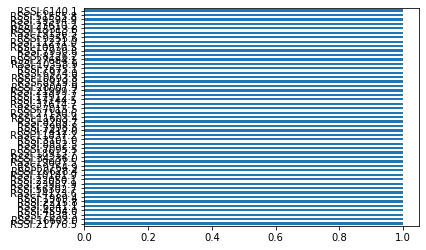

In [22]:
df4['RSSI'].value_counts().plot.barh()

In [23]:
df1 = pd.get_dummies(df1)
df1

,Barang_batik,Barang_blouse,Barang_boot cut,Barang_cardigan,Barang_cargo pants,Barang_catsuit,Barang_deck pants,Barang_frontier pants,Barang_gamis,Barang_hoodie,...,RSSI_ RSSI:8648.7,RSSI_ RSSI:8750.7,RSSI_ RSSI:8840.4,RSSI_ RSSI:9068.4,RSSI_ RSSI:9100.6,RSSI_ RSSI:9154.8,RSSI_ RSSI:9247.9,RSSI_ RSSI:9295.2,RSSI_ RSSI:9299.7,RSSI_ RSSI:9520.6
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
66,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
67,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
68,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
df2 = pd.get_dummies(df2)
df2

,Nama Barang_batik,Nama Barang_blazer,Nama Barang_blouse,Nama Barang_boot cut,Nama Barang_cardigan,Nama Barang_cargo pants,Nama Barang_catsuit,Nama Barang_deck pants,Nama Barang_frontier pants,Nama Barang_gamis,...,RSSI_ RSSI:7836.7,RSSI_ RSSI:8789.5,RSSI_ RSSI:9038.6,RSSI_ RSSI:9038.9,RSSI_ RSSI:9091.3,RSSI_ RSSI:9309.8,RSSI_ RSSI:9517.9,RSSI_ RSSI:9542.9,RSSI_ RSSI:9859.5,RSSI_ RSSI:9975.3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
68,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
70,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
df3 = pd.get_dummies(df3)
df3

,Nama barang_batik,Nama barang_blazer,Nama barang_blouse,Nama barang_boot cut,Nama barang_cardigan,Nama barang_cargo pants,Nama barang_catsuit,Nama barang_deck pants,Nama barang_frontier pants,Nama barang_gamis,...,RSSI_ RSSI:9200.9,RSSI_ RSSI:9213.1,RSSI_ RSSI:9704.0,RSSI_ RSSI:9710.7,RSSI_ RSSI:9724.7,RSSI_ RSSI:9730.2,RSSI_ RSSI:9756.8,RSSI_ RSSI:9846.2,RSSI_ RSSI:9907.0,RSSI_ RSSI:9947.3
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
128,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [26]:
df4 = pd.get_dummies(df4)
df4

,Nama Barang_batik,Nama Barang_blaouse,Nama Barang_blazer,Nama Barang_blouse,Nama Barang_boot cut,Nama Barang_cardigan,Nama Barang_cargo pants,Nama Barang_catsuit,Nama Barang_deck pants,Nama Barang_frontier pants,...,RSSI_ RSSI:7675.1,RSSI_ RSSI:7838.3,RSSI_ RSSI:7930.8,RSSI_ RSSI:7998.8,RSSI_ RSSI:8126.2,RSSI_ RSSI:8209.7,RSSI_ RSSI:8852.5,RSSI_ RSSI:8919.8,RSSI_ RSSI:9255.6,RSSI_ RSSI:9764.9
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
x =df1.drop("Barang_batik", axis=1)
y = df1['Barang_batik']

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size = 0.3, random_state = 42)

In [30]:
df1.all()
df1.cummin()
df1.cummax()
df1.describe()

,Barang_batik,Barang_blouse,Barang_boot cut,Barang_cardigan,Barang_cargo pants,Barang_catsuit,Barang_deck pants,Barang_frontier pants,Barang_gamis,Barang_hoodie,...,RSSI_ RSSI:8648.7,RSSI_ RSSI:8750.7,RSSI_ RSSI:8840.4,RSSI_ RSSI:9068.4,RSSI_ RSSI:9100.6,RSSI_ RSSI:9154.8,RSSI_ RSSI:9247.9,RSSI_ RSSI:9295.2,RSSI_ RSSI:9299.7,RSSI_ RSSI:9520.6
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,...,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,0.042857,0.057143,0.028571,0.014286,0.014286,0.042857,0.042857,0.042857,0.014286,0.057143,...,0.028571,0.014286,0.014286,0.028571,0.014286,0.014286,0.028571,0.014286,0.014286,0.014286
std,0.203997,0.233791,0.167802,0.119523,0.119523,0.203997,0.203997,0.203997,0.119523,0.233791,...,0.167802,0.119523,0.119523,0.167802,0.119523,0.119523,0.167802,0.119523,0.119523,0.119523
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
df2.all()
df2.cummin()
df2.cummax()
df2.describe()

,Nama Barang_batik,Nama Barang_blazer,Nama Barang_blouse,Nama Barang_boot cut,Nama Barang_cardigan,Nama Barang_cargo pants,Nama Barang_catsuit,Nama Barang_deck pants,Nama Barang_frontier pants,Nama Barang_gamis,...,RSSI_ RSSI:7836.7,RSSI_ RSSI:8789.5,RSSI_ RSSI:9038.6,RSSI_ RSSI:9038.9,RSSI_ RSSI:9091.3,RSSI_ RSSI:9309.8,RSSI_ RSSI:9517.9,RSSI_ RSSI:9542.9,RSSI_ RSSI:9859.5,RSSI_ RSSI:9975.3
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,...,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,0.027778,0.041667,0.013889,0.041667,0.055556,0.027778,0.027778,0.027778,0.013889,0.027778,...,0.013889,0.013889,0.013889,0.013889,0.013889,0.013889,0.013889,0.013889,0.013889,0.013889
std,0.165489,0.201229,0.117851,0.201229,0.230669,0.165489,0.165489,0.165489,0.117851,0.165489,...,0.117851,0.117851,0.117851,0.117851,0.117851,0.117851,0.117851,0.117851,0.117851,0.117851
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [32]:
df3.all()
df3.cummin()
df3.cummax()
df3.describe()

,Nama barang_batik,Nama barang_blazer,Nama barang_blouse,Nama barang_boot cut,Nama barang_cardigan,Nama barang_cargo pants,Nama barang_catsuit,Nama barang_deck pants,Nama barang_frontier pants,Nama barang_gamis,...,RSSI_ RSSI:9200.9,RSSI_ RSSI:9213.1,RSSI_ RSSI:9704.0,RSSI_ RSSI:9710.7,RSSI_ RSSI:9724.7,RSSI_ RSSI:9730.2,RSSI_ RSSI:9756.8,RSSI_ RSSI:9846.2,RSSI_ RSSI:9907.0,RSSI_ RSSI:9947.3
count,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,...,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000,132.000000
mean,0.060606,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.022727,0.015152,...,0.007576,0.007576,0.007576,0.007576,0.007576,0.007576,0.007576,0.007576,0.007576,0.007576
std,0.239515,0.149600,0.149600,0.149600,0.149600,0.149600,0.149600,0.149600,0.149600,0.122621,...,0.087039,0.087039,0.087039,0.087039,0.087039,0.087039,0.087039,0.087039,0.087039,0.087039
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [33]:
df4.all()
df4.cummin()
df4.cummax()
df4.describe()

,Nama Barang_batik,Nama Barang_blaouse,Nama Barang_blazer,Nama Barang_blouse,Nama Barang_boot cut,Nama Barang_cardigan,Nama Barang_cargo pants,Nama Barang_catsuit,Nama Barang_deck pants,Nama Barang_frontier pants,...,RSSI_ RSSI:7675.1,RSSI_ RSSI:7838.3,RSSI_ RSSI:7930.8,RSSI_ RSSI:7998.8,RSSI_ RSSI:8126.2,RSSI_ RSSI:8209.7,RSSI_ RSSI:8852.5,RSSI_ RSSI:8919.8,RSSI_ RSSI:9255.6,RSSI_ RSSI:9764.9
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,0.037736,0.018868,0.018868,0.037736,0.037736,0.018868,0.037736,0.037736,0.037736,0.056604,...,0.018868,0.018868,0.018868,0.018868,0.018868,0.018868,0.018868,0.018868,0.018868,0.018868
std,0.192380,0.137361,0.137361,0.192380,0.192380,0.137361,0.192380,0.192380,0.192380,0.233295,...,0.137361,0.137361,0.137361,0.137361,0.137361,0.137361,0.137361,0.137361,0.137361,0.137361
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [34]:
from sklearn import linear_model
model = linear_model.LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [35]:
model.score(x_test, y_test)

1.0